In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import glob
%matplotlib inline

##Import Data

In [2]:
cd /Users/matthewmitchell/Desktop/Delta_Math_Data/

/Users/matthewmitchell/Desktop/Delta_Math_Data


In [3]:
allFiles = glob.glob("*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_, ignore_index=True)

In [4]:
frame.columns = ['Student_ID','Problem_Type','Problem_ID','Correct','Timestamp']

In [5]:
frame.head()

,Student_ID,Problem_Type,Problem_ID,Correct,Timestamp
0,132052,reflectFuncsLevel2,1030431,1,1444175466
1,149587,distributiveProperty,269978,0,1444175520
2,153807,_csterner_onestepeqaddsub2,763284,1,1444175492
3,152677,solveEquationsMixedFactoring,881237,0,1444176480
4,134650,mixedTransformationsL1,1028560,1,1444175494


In [6]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9883529 entries, 0 to 9883528
Data columns (total 5 columns):
Student_ID      int64
Problem_Type    object
Problem_ID      float64
Correct         float64
Timestamp       float64
dtypes: float64(3), int64(1), object(1)
memory usage: 452.4+ MB


##Convert Timestamps to Datetimes

In [35]:
# datetimes = [datetime.fromtimestamp(frame.Timestamp[i]) for i in range(len(frame))]
datetimes = []
for i in range(len(frame)):
    try:
        datetimes.append(datetime.fromtimestamp(frame.Timestamp[i]))
    except:
        print 'error on row:', i
        datetimes.append(np.nan)

error on row: 6883528


In [38]:
frame['Datetime'] = datetimes

In [64]:
frame.Datetime = pd.to_datetime(frame.Datetime)

In [65]:
type(frame.Datetime)

pandas.tseries.index.DatetimeIndex

In [66]:
frame['Week'] = frame.Datetime.week

In [68]:
frame.head()

,Student_ID,Problem_Type,Problem_ID,Correct,Timestamp,Datetime,Week
0,132052,reflectFuncsLevel2,1030431,1,1444175466,2015-10-06 19:51:06,41
1,149587,distributiveProperty,269978,0,1444175520,2015-10-06 19:52:00,41
2,153807,_csterner_onestepeqaddsub2,763284,1,1444175492,2015-10-06 19:51:32,41
3,152677,solveEquationsMixedFactoring,881237,0,1444176480,2015-10-06 20:08:00,41
4,134650,mixedTransformationsL1,1028560,1,1444175494,2015-10-06 19:51:34,41


##Graphing Average Weekly Usership (5+ problems minimum for user to be counted)

In [96]:
#groupby week
#value count by users
#filter 5+ problems
# histogram of results

grouped = frame.groupby(['Week', 'Student_ID']).count()
wkly_usrs5plus = grouped[grouped.Problem_Type>4]
wkly_usrs5plus = wkly_usrs5plus.reset_index()
active_wkly_usrs = wkly_usrs5plus.groupby('Week')['Student_ID'].count()

<Container object of 41 artists>

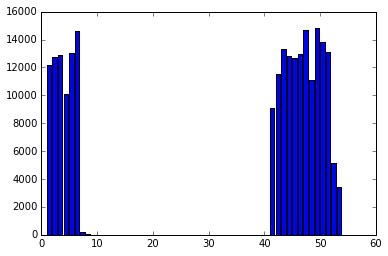

In [106]:
plt.bar(active_wkly_usrs.index, active_wkly_usrs.values)

In [223]:
grouped.tail()

Problem_Type  Problem_ID  Correct  Timestamp  Datetime
Week Student_ID                                                        
53   174465                38          38       38         38        38
     174467                 2           2        2          2         2
     174468                 2           2        2          2         2
     174469                 1           1        1          1         1
     174472                 5           5        5          5         5

##A user's rolling average over time....

In [124]:
len(frame.Student_ID.unique())

55627

In [224]:
frame.head()

,Student_ID,Problem_Type,Problem_ID,Correct,Timestamp,Datetime,Week
0,132052,reflectFuncsLevel2,1030431,1,1444175466,2015-10-06 19:51:06,41
1,149587,distributiveProperty,269978,0,1444175520,2015-10-06 19:52:00,41
2,153807,_csterner_onestepeqaddsub2,763284,1,1444175492,2015-10-06 19:51:32,41
3,152677,solveEquationsMixedFactoring,881237,0,1444176480,2015-10-06 20:08:00,41
4,134650,mixedTransformationsL1,1028560,1,1444175494,2015-10-06 19:51:34,41


In [139]:
frame.ix[0]['Datetime']

Timestamp('2015-10-06 19:51:06')

In [148]:
frame[frame.Student_ID==152677].reset_index().ix[0]['Datetime']

Timestamp('2015-10-06 20:08:00')

In [162]:
ravg = [1,1, 2.0/3,0.75 ]
ravg2 = [1,0.5, 2.0/3,0.75,0.8 ]

In [164]:
plt.plot?

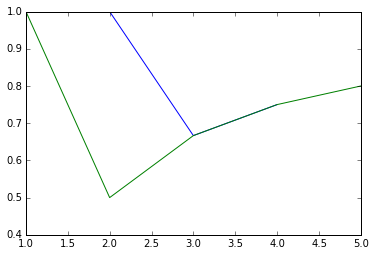

In [163]:
plt.plot(range(1,len(ravg)+1),ravg)
plt.plot(range(1,len(ravg2)+1),ravg2)

In [177]:
active_students[:5]

0     40352
1     23101
2    142214
3    123518
4    123514
Name: StudentID, dtype: int64

In [269]:
answered.head()

,Student_ID,Problem_Type,Problem_ID,Correct,Timestamp,Datetime,Week
0,132052,reflectFuncsLevel2,1030431,1,1444175466,2015-10-06 19:51:06,41
1,149587,distributiveProperty,269978,0,1444175520,2015-10-06 19:52:00,41
2,153807,_csterner_onestepeqaddsub2,763284,1,1444175492,2015-10-06 19:51:32,41
3,152677,solveEquationsMixedFactoring,881237,0,1444176480,2015-10-06 20:08:00,41
4,134650,mixedTransformationsL1,1028560,1,1444175494,2015-10-06 19:51:34,41


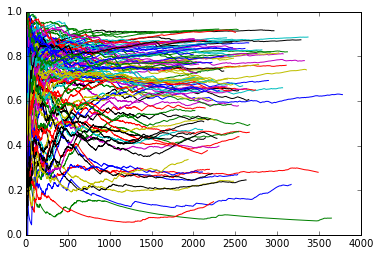

In [189]:
users_rolling_avg_dict ={}
for user in active_students[:100]:
    user_rolling_avg =[]
    attempts = 0.0
    correct = 0.0
    user_problem_log = answered[answered.Student_ID == user]
#     first_submission = user_problem_log.reset_index().ix[0]['Datetime']
    for row in user_problem_log.itertuples():
                score = row[4]
                attempts += 1.0
                correct += score
                user_rolling_avg.append(correct/attempts)
    plt.plot(range(1, len(user_rolling_avg)+1), user_rolling_avg)
    users_rolling_avg_dict[user] = user_rolling_avg
                
                

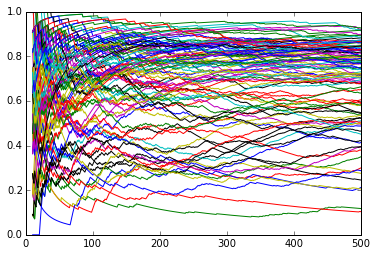

In [193]:
users_rolling_avg_dict ={}
for user in active_students[:100]:
    user_rolling_avg =[]
    attempts = 0.0
    correct = 0.0
    user_problem_log = answered[answered.Student_ID == user]
#     first_submission = user_problem_log.reset_index().ix[0]['Datetime']
    for row in user_problem_log.itertuples():
        if attempts>500:
            break
        elif attempts<10:
            score =row[4]
            attempts += 1
            correct += score
        else:
            score = row[4]
            attempts += 1.0
            correct += score
            user_rolling_avg.append(correct/attempts)
    plt.plot(range(10, len(user_rolling_avg)+10), user_rolling_avg)
    users_rolling_avg_dict[user] = user_rolling_avg
                
                

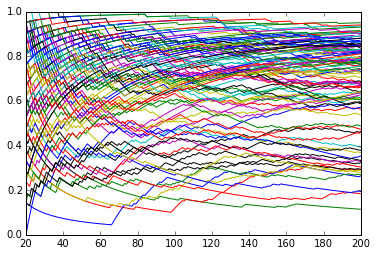

In [195]:
users_rolling_avg_dict ={}
for user in active_students[:100]:
    user_rolling_avg =[]
    attempts = 0.0
    correct = 0.0
    user_problem_log = answered[answered.Student_ID == user]
#     first_submission = user_problem_log.reset_index().ix[0]['Datetime']
    for row in user_problem_log.itertuples():
        if attempts>200:
            break
        elif attempts<20:
            score =row[4]
            attempts += 1
            correct += score
        else:
            score = row[4]
            attempts += 1.0
            correct += score
            user_rolling_avg.append(correct/attempts)
    plt.plot(range(20, len(user_rolling_avg)+20), user_rolling_avg)
    users_rolling_avg_dict[user] = user_rolling_avg
                
                

ERROR! Session/line number was not unique in database. History logging moved to new session 303


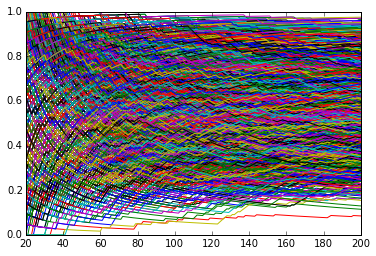

In [217]:
users_rolling_avg_dict ={}
for user in active_students[:5000]:
    user_rolling_avg =[]
    attempts = 0.0
    correct = 0.0
    user_problem_log = answered[answered.Student_ID == user]
#     first_submission = user_problem_log.reset_index().ix[0]['Datetime']
    for row in user_problem_log.itertuples():
        if attempts>200:
            break
        elif attempts<20:
            score =row[4]
            attempts += 1
            correct += score
        else:
            score = row[4]
            attempts += 1.0
            correct += score
            user_rolling_avg.append(correct/attempts)
    plt.plot(range(20, len(user_rolling_avg)+20), user_rolling_avg)
    users_rolling_avg_dict[user] = user_rolling_avg
                
                

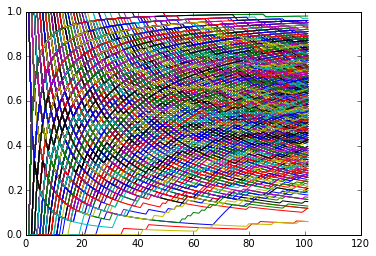

In [218]:
users_rolling_avg_dict ={}
for user in active_students[:1000]:
    user_rolling_avg =[]
    attempts = 0.0
    correct = 0.0
    user_problem_log = answered[answered.Student_ID == user]
#     first_submission = user_problem_log.reset_index().ix[0]['Datetime']
    for row in user_problem_log.itertuples():
        if attempts>100:
            break
#         elif attempts<20:
#             score =row[4]
#             attempts += 1
#             correct += score
        else:
            score = row[4]
            attempts += 1.0
            correct += score
            user_rolling_avg.append(correct/attempts)
    plt.plot(range(1, len(user_rolling_avg)+1), user_rolling_avg)
    users_rolling_avg_dict[user] = user_rolling_avg
                
                

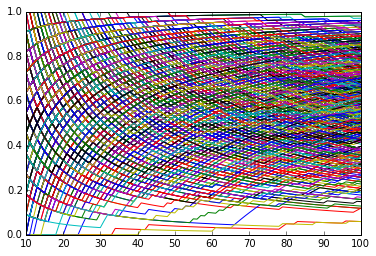

In [219]:
users_rolling_avg_dict ={}
for user in active_students[:1000]:
    user_rolling_avg =[]
    attempts = 0.0
    correct = 0.0
    user_problem_log = answered[answered.Student_ID == user]
#     first_submission = user_problem_log.reset_index().ix[0]['Datetime']
    for row in user_problem_log.itertuples():
        if attempts>100:
            break
        elif attempts<10:
            score =row[4]
            attempts += 1
            correct += score
        else:
            score = row[4]
            attempts += 1.0
            correct += score
            user_rolling_avg.append(correct/attempts)
    plt.plot(range(10, len(user_rolling_avg)+10), user_rolling_avg)
    users_rolling_avg_dict[user] = user_rolling_avg
                
                

###How does the %correct vary as a probability distribution over users for any given # of answers?

In [204]:
range(20,100,10)

[20, 30, 40, 50, 60, 70, 80, 90]

(array([  1.,   4.,   6.,   5.,  10.,  10.,  10.,  12.,  15.,  27.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

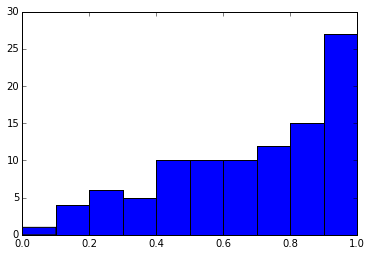

In [206]:
n=20
avg_at_n = []
for user in users_rolling_avg_dict.values():
    avg_at_n.append(user[n-20])
 plt.hist(avg_at_n)

(array([  1.,   7.,   5.,   8.,   5.,  12.,  13.,  16.,  24.,   9.]),
 array([ 0.09677419,  0.18709677,  0.27741935,  0.36774194,  0.45806452,
         0.5483871 ,  0.63870968,  0.72903226,  0.81935484,  0.90967742,  1.        ]),
 <a list of 10 Patch objects>)

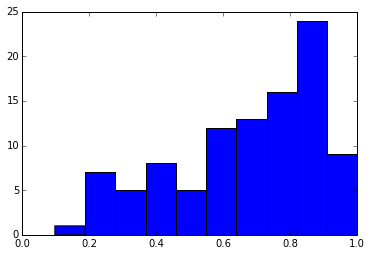

In [212]:
n=30
avg_at_n = []
for user in users_rolling_avg_dict.values():
    avg_at_n.append(user[n-20])
plt.hist(avg_at_n)

(array([  1.,   5.,   6.,   5.,   7.,  11.,  10.,  21.,  17.,  17.]),
 array([ 0.07317073,  0.16341463,  0.25365854,  0.34390244,  0.43414634,
         0.52439024,  0.61463415,  0.70487805,  0.79512195,  0.88536585,
         0.97560976]),
 <a list of 10 Patch objects>)

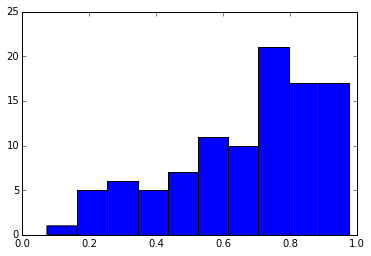

In [213]:
n=40
avg_at_n = []
for user in users_rolling_avg_dict.values():
    avg_at_n.append(user[n-20])
plt.hist(avg_at_n)

(array([  2.,   7.,   4.,   4.,   7.,   4.,  20.,  19.,  24.,   9.]),
 array([ 0.11881188,  0.2049505 ,  0.29108911,  0.37722772,  0.46336634,
         0.54950495,  0.63564356,  0.72178218,  0.80792079,  0.89405941,
         0.98019802]),
 <a list of 10 Patch objects>)

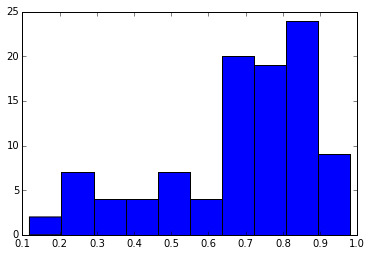

In [214]:
n=100
avg_at_n = []
for user in users_rolling_avg_dict.values():
    avg_at_n.append(user[n-20])
plt.hist(avg_at_n)

(array([  3.,   3.,   8.,   3.,   4.,   8.,  14.,  17.,  27.,  13.]),
 array([ 0.11442786,  0.19800995,  0.28159204,  0.36517413,  0.44875622,
         0.53233831,  0.6159204 ,  0.69950249,  0.78308458,  0.86666667,
         0.95024876]),
 <a list of 10 Patch objects>)

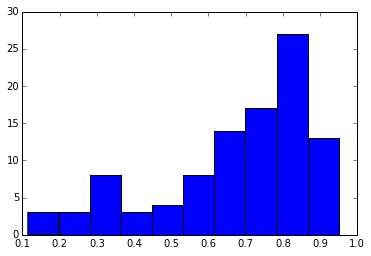

In [215]:
n=200
avg_at_n = []
for user in users_rolling_avg_dict.values():
    avg_at_n.append(user[n-20])
plt.hist(avg_at_n)

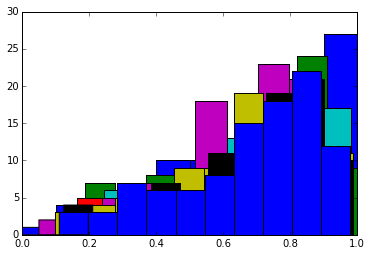

In [209]:
plt.figure()
percent_after_n_Q = range(20,100,10)
distribution_after_n_questions = {}
for n in percent_after_n_Q:
    avg_at_n = []
    for user in users_rolling_avg_dict.values():
        avg_at_n.append(user[n-20])
    distribution_after_n_questions[n] = avg_at_n
    plt.hist(avg_at_n)

In [119]:
frame.Datetime[-1]-frame.Datetime[0]

Timedelta('130 days 19:33:55')

##Activity by User

In [126]:
df_student_freq = frame['Student_ID'].value_counts()
df_student_freq = pd.DataFrame(df_student_freq)
df_student_freq = df_student_freq.reset_index()
df_student_freq.columns=['StudentID','Number_problems']

In [127]:
df_student_freq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55627 entries, 0 to 55626
Data columns (total 2 columns):
StudentID          55627 non-null int64
Number_problems    55627 non-null int64
dtypes: int64(2)
memory usage: 1.3 MB


In [216]:
df_student_freq.head(20)

,StudentID,Number_problems
0,40352,3862
1,23101,3651
2,142214,3590
3,123518,3393
4,123514,3372
5,156796,3369
6,124030,3308
7,136749,3216
8,40286,3167
9,59935,3136


In [173]:
len(df_student_freq)

55627

In [176]:
active_students = df_student_freq[df_student_freq.Number_problems>25].StudentID

In [129]:
df_student_freq.describe()

,StudentID,Number_problems
count,55627.000000,55627.000000
mean,144089.216639,177.675032
std,36192.586432,256.990387
min,979.000000,1.000000
25%,134290.500000,25.000000
50%,153915.000000,82.000000
75%,169303.500000,227.000000
max,185635.000000,3862.000000


In [130]:
df_student_freq.Number_problems.quantile([i/10.0 for i in range(1,10)])

0.1      7
0.2     18
0.3     33
0.4     54
0.5     82
0.6    121
0.7    182
0.8    284
0.9    465
dtype: float64

In [131]:
Users50to1500 = df_student_freq[(df_student_freq.Number_problems>50) & (df_student_freq.Number_problems<1500)].Number_problems

In [132]:
print len(Users50to1500)

33969


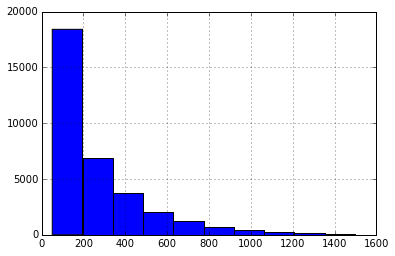

In [254]:
Users50to1500.hist()

In [74]:
Users50to200 = df_student_freq[(df_student_freq.Number_problems>50) & (df_student_freq.Number_problems<200)].Number_problems

In [78]:
print len(Users50to200)

18683


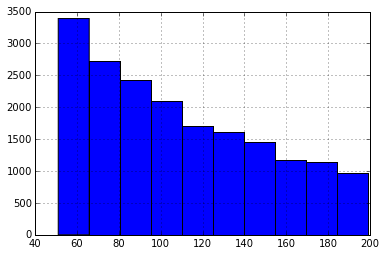

In [75]:
Users50to200.hist()

In [76]:
Users0to200 = df_student_freq[(df_student_freq.Number_problems<200)].Number_problems

##Cumulative Number of Users over Time

##Number Questions per Problem Type for a Random 'Active' User

In [11]:
random_active_student = np.random.choice(df_student_freq[df_student_freq.Number_problems>250].StudentID)

In [12]:
random_active_student

66673

In [15]:
frame[frame['Student_ID']==random_active_student]['Problem_Type'].value_counts()[:10]

custom1                       131
nineTrigGraphsRadian           47
angleSumRadical                27
inverseTrigFunctions           26
specialTriangles               25
exactTrigValueGraphically2     17
calculateRegression            16
positiveAcuteCofunction        16
strategyMakeupNumber           14
permutationVsCombination       14
dtype: int64

##How many Problem ID's are there for this Problem Type?
##What's the distribution of these Problem ID's?

989


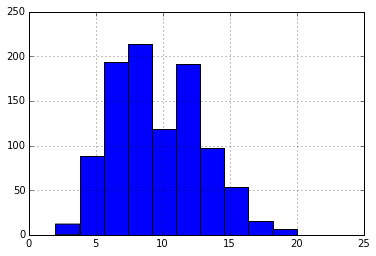

In [95]:
print len(frame[frame['Problem_Type']=='reducingFractionsWithX']['Problem_ID'].value_counts())
id_freq = frame[frame['Problem_Type']=='reducingFractionsWithX']['Problem_ID'].value_counts()
id_freq.hist()

##-1 Correct....(student did not answer)
###These only account for 4.7% of the data...

In [185]:
len(frame[frame['Correct']!=-1])

9411025

In [186]:
len(frame)

9883529

In [187]:
(9883529-9411025)/9883529.0

0.047807215418703176

In [225]:
answered = frame[frame['Correct']!=-1]

##Number of Submissions per Question

In [98]:
Q_Number_Submissions = pd.DataFrame(answered['Problem_Type'].value_counts())
Q_Number_Submissions = Q_Number_Submissions.reset_index()
Q_Number_Submissions.columns = ['Problem_Type', 'Number_Submissions']

In [99]:
Q_Number_Submissions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 766
Data columns (total 2 columns):
Problem_Type          767 non-null object
Number_Submissions    767 non-null int64
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


In [100]:
Q_Number_Submissions.head()

,Problem_Type,Number_Submissions
0,custom1,322944
1,slopeFromPoints,106529
2,linearEquations,102688
3,_csterner_twostepeq,97208
4,slopeGraphically,92286


In [104]:
Q_Number_Submissions.Number_Submissions.quantile([i/10.0 for i in range(1,10)])

0.1      906.8
0.2     1878.0
0.3     3279.8
0.4     5216.2
0.5     6761.0
0.6     9322.4
0.7    12881.8
0.8    18383.2
0.9    27376.4
dtype: float64

In [111]:
Q_Number_Submissions.Number_Submissions.quantile([i/100.0 for i in range(90, 100)])

0.90    27376.40
0.91    29539.10
0.92    32459.56
0.93    35265.28
0.94    39355.80
0.95    42107.70
0.96    47459.64
0.97    52032.60
0.98    57449.92
0.99    81212.34
dtype: float64

In [108]:
max(Q_Number_Submissions.Number_Submissions)

322944

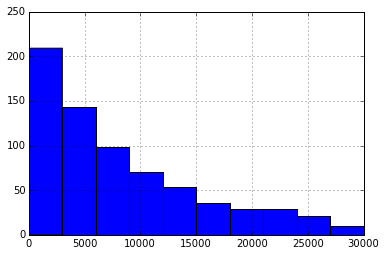

In [113]:
Q_Number_Submissions[Q_Number_Submissions.Number_Submissions<3*10**4]['Number_Submissions'].hist()

In [29]:
Q_1000_Submissions = Q_Number_Submissions[Q_Number_Submissions.Number_Submissions>1000]['Problem_Type']

##Basic Question Difficulty Metric (% Correct Across all users)

In [31]:
Q_Percent_Correct = pd.DataFrame(answered.groupby('Problem_Type')['Correct'].mean())
Q_Percent_Correct = Q_Percent_Correct.reset_index()
Q_Percent_Correct.columns=['Problem_Type','Percent_Correct']

In [32]:
Q_Percent_Correct.sort_index(by='Percent_Correct', ascending=False).head()

,Problem_Type,Percent_Correct
94,_jhall_SimpCompInt,1
55,_jhall_CompInt1,1
40,_grubinstein_euclideanalgorithm,1
41,_grubinstein_fibonaccisumtrick,1
42,_grubinstein_modinverse,1


In [34]:
Q_1000plus_Percent = Q_Percent_Correct[Q_Percent_Correct.Problem_Type.isin(Q_1000_Submissions)]
Q_1000plus_Percent.sort_index(by='Percent_Correct', ascending=False).head()

,Problem_Type,Percent_Correct
711,translateFigureVector,0.982970
464,meanGraphicallySpread,0.978204
463,meanGraphicallyLong,0.976392
642,rotateArbitraryPointGuided,0.972889
360,functionTransformDiscovery,0.958121


##Remorf Raw Data into User Database
###{usr1:{problem1:[historical %], problem 2:[%,%,...,%],.....}, usr2.....}

In [10]:
students = frame.Student_ID.unique()
problems = frame.Problem_Type.unique()

In [11]:
frame.head()

,Student_ID,Problem_Type,Problem_ID,Correct,Timestamp,Datetime,Week,Problem_Desc,Subject
0,132052,reflectFuncsLevel2,1030431,1,1444175466,2015-10-06 19:51:06,41,Graphing Trig Functions (Level 2),A2 / Trig
1,149587,distributiveProperty,269978,0,1444175520,2015-10-06 19:52:00,41,The Distributive Property,Pre-Algebra
2,153807,_csterner_onestepeqaddsub2,763284,1,1444175492,2015-10-06 19:51:32,41,Forces,A2 / Trig
3,152677,solveEquationsMixedFactoring,881237,0,1444176480,2015-10-06 20:08:00,41,Solve Equations by Factoring (Mixed),A2 / Trig
4,134650,mixedTransformationsL1,1028560,1,1444175494,2015-10-06 19:51:34,41,Function Transformations on a Point,A2 / Trig


In [46]:
def student_subject_and_rank():
    dictionary={}
    counter=0
    for student in students:
        counter+=1
        if counter>100:
            break
        else:
            student_data = frame[frame.Student_ID==student]
            student_dict = {}
            for row in student_data.itertuples():
#                 Q = row[1]
                score = row[4]
                subject = row[-1]
                student_dict[subject] = student_dict.get(subject,0)+1
                student_dict['attempts'] = student_dict.get('attempts', 0)+1
                student_dict['correct'] = student_dict.get('correct', 0)+score
        dictionary[student] = student_dict
    return dictionary
    

In [47]:
student_group_dict = student_subject_and_rank()

In [48]:
len(student_group_dict)

100

In [36]:
def add_entry(user, problem, correct):
    user_history = dictionary.get(user, 'no_user')
    
    if user_history == 'no_user':
        dictionary[user]={problem:[correct]}
        
    else:
        Q_history = user_history.get(problem, 'no_problem')

        if Q_history == 'no_problem':
            dictionary[user][problem] = [correct]
        
        else:
            prev_sum = Q_history[-1]*len(Q_history)
            new_entry = float(prev_sum+correct)/(len(Q_history)+1)
            Q_history.append(new_entry)
            dictionary[user][problem] = Q_history

In [38]:
def test_creation():
    dictionary={}
    counter=0
    for student in students:
        counter+=1
        if counter>100:
            break
        else:
            student_data = frame[frame.Student_ID==student]
            for row in student_data.itertuples():
                Q = row[2]
                Score = row[4]
                add_entry(student, Q, Score)
    

In [60]:
dictionary = {}

In [61]:
test_creation()

In [41]:
%timeit test_creation()

1 loops, best of 3: 17.6 s per loop


In [43]:
(550*18)/60

165

####~17.6 seconds for 100 users; ~55,000 users... anticipated time to reformat: 550*18seconds=9900seconds=165 minutes= 2+hours...


##Check for anomolies first...

In [45]:
len(dictionary)

100

In [46]:
dictionary.keys()[:5]

[140631, 142357, 137245, 97316, 121437]

In [53]:
len(dictionary[140631]['lineFromTwoPoints'])

16

In [62]:
dictionary[140631].items()[:2]

[('lineFromTwoPoints', [0.0, 0.0, 0.3333333333333333, 0.5]),
 ('dpsFactoringLevel1', [0.0, 0.5, 0.6666666666666666])]

In [57]:
print len(dictionary[140631])
print len(frame[(frame.Student_ID==140631)].Problem_Type.unique())

64
64


In [59]:
frame[(frame.Student_ID==140631) & (frame.Problem_Type=='dpsFactoringLevel1')]

,Student_ID,Problem_Type,Problem_ID,Correct,Timestamp
8780433,140631,dpsFactoringLevel1,765617,0,1454196373
8780471,140631,dpsFactoringLevel1,765286,1,1454196522
8780496,140631,dpsFactoringLevel1,765409,1,1454196573


In [76]:
user_df = pd.DataFrame.from_dict(dictionary, orient='index')
user_df = user_df.reset_index()
user_df.rename(columns={'index':'Student_ID'}, inplace=True)

In [82]:
user_df.head()

,Student_ID,lineFromTwoPoints,dpsFactoringLevel1,percentIncreaseDecreaseLevel3,slopeFromPoints,_bmueller_expEqToPercentGrowthDecay,parallelPerpenGraphically,parallelPerpenEquations,binomialToPower,_jhall_SubAnimals,...,verticalAsymptotes,directedSegmentRatio,_bnockles_rightTriangleProportions,triangleCongruentCriteria,_jhall_Centriod,polynomialDivisionFindDividend,findXintercepts,findRationalHoles,custom6,findFunctionRelationship
0,16518,"[0.0, 0.5, 0.666666666667]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16677,"[1.0, 0.5, 0.666666666667]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,22761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35261,NaN,"[1.0, 0.5, 0.666666666667, 0.75, 0.8, 0.833333...","[1.0, 0.5, 0.666666666667, 0.75, 0.8, 0.833333...",NaN,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
frame[(frame.Student_ID==153807)&(frame.Problem_Type=='slopeFromPoints')]

,Student_ID,Problem_Type,Problem_ID,Correct,Timestamp
1644744,153807,slopeFromPoints,306459,1,1446150321
1720551,153807,slopeFromPoints,306395,1,1446150403
1720676,153807,slopeFromPoints,305808,1,1446150497
1720789,153807,slopeFromPoints,305717,0,1446150553
1720881,153807,slopeFromPoints,306088,1,1446150614
1720957,153807,slopeFromPoints,306456,1,1446150712
1721090,153807,slopeFromPoints,306620,1,1446150776
1721204,153807,slopeFromPoints,306151,0,1446150822
1721278,153807,slopeFromPoints,305941,1,1446150891
1721371,153807,slopeFromPoints,306007,1,1446150942


##Another (simpler) Data Transform:
### User: {Problem: [Number Correct, Number Attempts], Problem: [ ] }...

In [255]:
answered.head()

,Student_ID,Problem_Type,Problem_ID,Correct,Timestamp,Datetime
0,132052,reflectFuncsLevel2,1030431,1,1444175466,1970-01-01 00:00:01.444175466
1,149587,distributiveProperty,269978,0,1444175520,1970-01-01 00:00:01.444175520
2,153807,_csterner_onestepeqaddsub2,763284,1,1444175492,1970-01-01 00:00:01.444175492
3,152677,solveEquationsMixedFactoring,881237,0,1444176480,1970-01-01 00:00:01.444176480
4,134650,mixedTransformationsL1,1028560,1,1444175494,1970-01-01 00:00:01.444175494


In [256]:
number_correct = pd.pivot_table(answered, values='Correct', index=['Student_ID'], columns=['Problem_Type'], aggfunc=np.sum)

In [257]:
attempts = pd.pivot_table(answered, values='Correct', index=['Student_ID'], columns=['Problem_Type'], aggfunc=len)

In [258]:
attempts.columns = [colName + 'Attempts' for colName in attempts.columns]

In [259]:
number_correct.columns = [colName + 'Correct' for colName in number_correct.columns]

In [260]:
attempts = attempts.reset_index()
number_correct = number_correct.reset_index()

In [261]:
attempts.head()

,Student_ID,FOILAlgebraicRadicalBinomialAttempts,_ajacoby_completeSquareAllEqnAttempts,_ajacoby_completeSquareEvenEqnAttempts,_ajacoby_idPropertyLvl1Attempts,_ajacoby_idPropertyLvl2Attempts,_ajacoby_surfaceAreaCylinderAttempts,_ajacoby_surfaceAreaRectangularPrismAttempts,_ajacoby_surfaceAreaSquarePyramidAttempts,_bmueller_completingTheSquareAttempts,...,writePiecewiseFromGraphAttempts,writePolynomialFunctionFromGraphAttempts,writeTrigFunctionsGivenFeaturesAttempts,xGameLevel1Attempts,xGameLevel2Attempts,xGameLevel3Attempts,xGameMasterProductAttempts,xGameSolveQuadraticAttempts,xInterceptsAlgebraicallyPolyAttempts,zerosCalc1Attempts
0,2292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,5
1,3416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [262]:
number_correct.head()

,Student_ID,FOILAlgebraicRadicalBinomialCorrect,_ajacoby_completeSquareAllEqnCorrect,_ajacoby_completeSquareEvenEqnCorrect,_ajacoby_idPropertyLvl1Correct,_ajacoby_idPropertyLvl2Correct,_ajacoby_surfaceAreaCylinderCorrect,_ajacoby_surfaceAreaRectangularPrismCorrect,_ajacoby_surfaceAreaSquarePyramidCorrect,_bmueller_completingTheSquareCorrect,...,writePiecewiseFromGraphCorrect,writePolynomialFunctionFromGraphCorrect,writeTrigFunctionsGivenFeaturesCorrect,xGameLevel1Correct,xGameLevel2Correct,xGameLevel3Correct,xGameMasterProductCorrect,xGameSolveQuadraticCorrect,xInterceptsAlgebraicallyPolyCorrect,zerosCalc1Correct
0,2292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,5
1,3416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##Merge Attempts/# Correct per Question into User Dataframe

In [263]:
user_df = pd.merge(number_correct, attempts, on='Student_ID')

In [264]:
user_df.head()

,Student_ID,FOILAlgebraicRadicalBinomialCorrect,_ajacoby_completeSquareAllEqnCorrect,_ajacoby_completeSquareEvenEqnCorrect,_ajacoby_idPropertyLvl1Correct,_ajacoby_idPropertyLvl2Correct,_ajacoby_surfaceAreaCylinderCorrect,_ajacoby_surfaceAreaRectangularPrismCorrect,_ajacoby_surfaceAreaSquarePyramidCorrect,_bmueller_completingTheSquareCorrect,...,writePiecewiseFromGraphAttempts,writePolynomialFunctionFromGraphAttempts,writeTrigFunctionsGivenFeaturesAttempts,xGameLevel1Attempts,xGameLevel2Attempts,xGameLevel3Attempts,xGameMasterProductAttempts,xGameSolveQuadraticAttempts,xInterceptsAlgebraicallyPolyAttempts,zerosCalc1Attempts
0,2292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,5
1,3416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [265]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53634 entries, 0 to 53633
Columns: 1535 entries, Student_ID to zerosCalc1Attempts
dtypes: float64(1534), int64(1)
memory usage: 628.5 MB


In [266]:
user_df = user_df.fillna(value=0)

In [267]:
user_df.head()

,Student_ID,FOILAlgebraicRadicalBinomialCorrect,_ajacoby_completeSquareAllEqnCorrect,_ajacoby_completeSquareEvenEqnCorrect,_ajacoby_idPropertyLvl1Correct,_ajacoby_idPropertyLvl2Correct,_ajacoby_surfaceAreaCylinderCorrect,_ajacoby_surfaceAreaRectangularPrismCorrect,_ajacoby_surfaceAreaSquarePyramidCorrect,_bmueller_completingTheSquareCorrect,...,writePiecewiseFromGraphAttempts,writePolynomialFunctionFromGraphAttempts,writeTrigFunctionsGivenFeaturesAttempts,xGameLevel1Attempts,xGameLevel2Attempts,xGameLevel3Attempts,xGameMasterProductAttempts,xGameSolveQuadraticAttempts,xInterceptsAlgebraicallyPolyAttempts,zerosCalc1Attempts
0,2292,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,23,5
1,3416,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3524,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3543,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3556,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [269]:
user_df.ix[:,1:].head()

,FOILAlgebraicRadicalBinomialCorrect,_ajacoby_completeSquareAllEqnCorrect,_ajacoby_completeSquareEvenEqnCorrect,_ajacoby_idPropertyLvl1Correct,_ajacoby_idPropertyLvl2Correct,_ajacoby_surfaceAreaCylinderCorrect,_ajacoby_surfaceAreaRectangularPrismCorrect,_ajacoby_surfaceAreaSquarePyramidCorrect,_bmueller_completingTheSquareCorrect,_bmueller_expEqToPercentGrowthDecayCorrect,...,writePiecewiseFromGraphAttempts,writePolynomialFunctionFromGraphAttempts,writeTrigFunctionsGivenFeaturesAttempts,xGameLevel1Attempts,xGameLevel2Attempts,xGameLevel3Attempts,xGameMasterProductAttempts,xGameSolveQuadraticAttempts,xInterceptsAlgebraicallyPolyAttempts,zerosCalc1Attempts
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,23,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Checkpoint: Pickle User Database

In [233]:
import pickle

In [132]:
with open('DeltaMathUserDB.pkl', 'w') as picklefile:
    pickle.dump(user_df, picklefile)

In [3]:
pwd

u'/Users/matthewmitchell/Desktop/Metis'

In [230]:
cd /Users/matthewmitchell/Desktop/Delta_Math_Data/

/Users/matthewmitchell/Desktop/Delta_Math_Data


In [231]:
ls

DeltaMathUserDB.pkl   data (14).csv         data (25).csv         data (29).csv         data (33).csv
Literature/           data (15).csv         data (26).csv         data (30).csv         data (34).csv
Problem_Descriptions/ data (16).csv         data (27).csv         data (31).csv
data (13).csv         data (17).csv         data (28).csv         data (32).csv


In [234]:
with open("DeltaMathUserDB.pkl", 'r') as picklefile: 
    user_df = pickle.load(picklefile)

In [237]:
user_df.head()

,Student_ID,FOILAlgebraicRadicalBinomialCorrect,_ajacoby_completeSquareAllEqnCorrect,_ajacoby_completeSquareEvenEqnCorrect,_ajacoby_idPropertyLvl1Correct,_ajacoby_idPropertyLvl2Correct,_ajacoby_surfaceAreaCylinderCorrect,_ajacoby_surfaceAreaRectangularPrismCorrect,_ajacoby_surfaceAreaSquarePyramidCorrect,_bmueller_completingTheSquareCorrect,...,writePiecewiseFromGraphAttempts,writePolynomialFunctionFromGraphAttempts,writeTrigFunctionsGivenFeaturesAttempts,xGameLevel1Attempts,xGameLevel2Attempts,xGameLevel3Attempts,xGameMasterProductAttempts,xGameSolveQuadraticAttempts,xInterceptsAlgebraicallyPolyAttempts,zerosCalc1Attempts
0,2292,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,23,5
1,3416,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3524,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3543,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3556,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Subset to Users with 50+ Questions Answered

In [236]:
#Recall that we have:
df_student_freq.head()

,StudentID,Number_problems
0,40352,3862
1,23101,3651
2,142214,3590
3,123518,3393
4,123514,3372


In [277]:
len(df_student_freq[(df_student_freq.Number_problems>50)])

34238

In [238]:
active_users = df_student_freq[(df_student_freq.Number_problems>50)]['StudentID']
active_user_df = user_df[user_df.Student_ID.isin(active_users)]
active_user_df.head()

,Student_ID,FOILAlgebraicRadicalBinomialCorrect,_ajacoby_completeSquareAllEqnCorrect,_ajacoby_completeSquareEvenEqnCorrect,_ajacoby_idPropertyLvl1Correct,_ajacoby_idPropertyLvl2Correct,_ajacoby_surfaceAreaCylinderCorrect,_ajacoby_surfaceAreaRectangularPrismCorrect,_ajacoby_surfaceAreaSquarePyramidCorrect,_bmueller_completingTheSquareCorrect,...,writePiecewiseFromGraphAttempts,writePolynomialFunctionFromGraphAttempts,writeTrigFunctionsGivenFeaturesAttempts,xGameLevel1Attempts,xGameLevel2Attempts,xGameLevel3Attempts,xGameMasterProductAttempts,xGameSolveQuadraticAttempts,xInterceptsAlgebraicallyPolyAttempts,zerosCalc1Attempts
0,2292,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,23,5
2,3524,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3543,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3574,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,9727,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Decomposition using PCA

In [227]:
from sklearn import decomposition

In [283]:
pca = decomposition.PCA(n_components=20)
pca.fit(user_df.ix[:,1:])

PCA(copy=True, n_components=20, whiten=False)

In [284]:
sum(pca.explained_variance_ratio_)

0.52959645864772253

####Trying again with only active users...

In [239]:
pca = decomposition.PCA(n_components=20)
pca.fit(active_user_df.ix[:,1:])

PCA(copy=True, n_components=20, whiten=False)

In [240]:
sum(pca.explained_variance_ratio_)

0.52904030060105145

####Increasing the number of components in order to retain a larger percent of the original variance

In [139]:
pca = decomposition.PCA(n_components=50)
pca.fit(user_df.ix[:,1:])

PCA(copy=True, n_components=50, whiten=False)

In [140]:
sum(pca.explained_variance_ratio_)

0.6752219865124055

In [141]:
pca = decomposition.PCA(n_components=500)
pca.fit(user_df.ix[:,1:])

PCA(copy=True, n_components=500, whiten=False)

In [142]:
sum(pca.explained_variance_ratio_)

0.97866884729168835

In [143]:
pca = decomposition.PCA(n_components=525)
pca.fit(user_df.ix[:,1:])

PCA(copy=True, n_components=525, whiten=False)

In [144]:
sum(pca.explained_variance_ratio_)

0.98114236136017263

In [145]:
pca = decomposition.PCA(n_components=575)
pca.fit(user_df.ix[:,1:])

PCA(copy=True, n_components=575, whiten=False)

In [146]:
sum(pca.explained_variance_ratio_)

0.98520688750140384

###Skipping Ahead...original analysis was performed using all users. This caused imbalanced groups; first of 40 groups had 33,000 of the 55,000 total users.

In [241]:
pca = decomposition.PCA(n_components=650)
pca.fit(active_user_df.ix[:,1:])

PCA(copy=True, n_components=650, whiten=False)

In [242]:
sum(pca.explained_variance_ratio_)

0.98989074285503664

In [243]:
new_basis = pca.transform(active_user_df.ix[:,1:])

In [244]:
from sklearn.cluster import KMeans

In [245]:
kmeans = KMeans

In [246]:
kmeans = KMeans(n_clusters=40)

In [247]:
kmeans.fit_transform(new_basis)

array([[  99.78435211,  107.33972736,  105.06825069, ...,  238.02193155,
         221.28828094,  199.01960216],
       [  44.00042742,   59.60535078,   55.29871594, ...,  232.57130129,
         203.672588  ,  177.56641188],
       [  67.79699673,   80.48403996,   75.40155511, ...,  236.00067622,
         210.00530573,  184.39980221],
       ..., 
       [  43.1790141 ,   65.32590584,   58.92906292, ...,  233.86866903,
         202.08931536,  170.50254338],
       [  45.56655751,   60.34378889,   56.88830821, ...,  232.91088345,
         204.11570715,  177.89803965],
       [  58.42331448,   72.25288927,   65.48510501, ...,  232.3836115 ,
         201.77960316,  181.05242364]])

In [248]:
groups = kmeans.predict(new_basis)

In [249]:
len(groups)

34237

In [250]:
len(active_user_df)

34237

In [253]:
active_user_df['group']=groups

/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [254]:
active_user_df.head()

,Student_ID,FOILAlgebraicRadicalBinomialCorrect,_ajacoby_completeSquareAllEqnCorrect,_ajacoby_completeSquareEvenEqnCorrect,_ajacoby_idPropertyLvl1Correct,_ajacoby_idPropertyLvl2Correct,_ajacoby_surfaceAreaCylinderCorrect,_ajacoby_surfaceAreaRectangularPrismCorrect,_ajacoby_surfaceAreaSquarePyramidCorrect,_bmueller_completingTheSquareCorrect,...,writePolynomialFunctionFromGraphAttempts,writeTrigFunctionsGivenFeaturesAttempts,xGameLevel1Attempts,xGameLevel2Attempts,xGameLevel3Attempts,xGameMasterProductAttempts,xGameSolveQuadraticAttempts,xInterceptsAlgebraicallyPolyAttempts,zerosCalc1Attempts,group
0,2292,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,23,5,27
2,3524,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
3,3543,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
5,3574,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
13,9727,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27


(array([ 38.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1.00000000e+00,   1.81450000e+03,   3.62800000e+03,
          5.44150000e+03,   7.25500000e+03,   9.06850000e+03,
          1.08820000e+04,   1.26955000e+04,   1.45090000e+04,
          1.63225000e+04,   1.81360000e+04]),
 <a list of 10 Patch objects>)

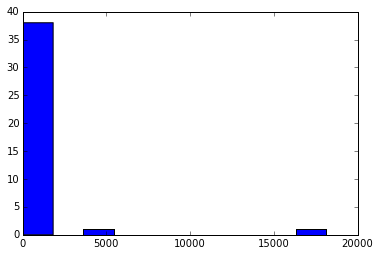

In [255]:
plt.hist(active_user_df.group.value_counts())

##Problem Descriptions

In [50]:
cd Problem_Descriptions/

/Users/matthewmitchell/Desktop/Delta_Math_Data/Problem_Descriptions


In [51]:
ls

DeltaMath_ProblemType_Descriptions copy.csv  DeltaMath_ProblemType_Descriptions.csv


In [52]:
problem_descriptions = pd.read_csv('DeltaMath_ProblemType_Descriptions.csv', header=None)
problem_descriptions.columns=['Problem_Desc']
problem_descriptions['Date_created'] = problem_descriptions.Problem_Desc.str[:12]
problem_descriptions.Problem_Desc = problem_descriptions.Problem_Desc.str[13:]

In [53]:
problem_descriptions.head()

,Problem_Desc,Date_created
0,Find Coordinate on Unit CircleA2 / Trig,"May 12, 2016"
1,Find Sine or Cosine Using IdentityA2 / Trig,"May 12, 2016"
2,Expression Strategies (Common Core)A2 / Trig,"May 10, 2016"
3,Equation Strategies (Common Core)A2 / Trig,"May 10, 2016"
4,Sample Error SimulationA2 / Trig,"May 01, 2016"


In [54]:
problem_descriptions.tail()

,Problem_Desc,Date_created
847,Product of FunctionsA2 / Trig,"Aug 31, 2010"
848,Profit FunctionsA2 / Trig,"Aug 31, 2010"
849,Invert Linear FunctionsA2 / Trig,"Aug 31, 2010"
850,Visual Domain and RangeA2 / Trig,"Aug 31, 2010"
851,Function DefinitionsA2 / Trig,"Aug 31, 2010"


In [55]:
#Clean Up Descriptions...Painfully
problem_descriptions['Subject'] = problem_descriptions.Problem_Desc.str.extract('(A2 / Trig)')
problem_descriptions.Subject = problem_descriptions.Subject.fillna(value=problem_descriptions.Problem_Desc.str.extract('(Algebra 1)'))
problem_descriptions.Subject = problem_descriptions.Subject.fillna(value=problem_descriptions.Problem_Desc.str.extract('(Pre-Algebra)'))
problem_descriptions.Subject = problem_descriptions.Subject.fillna(value=problem_descriptions.Problem_Desc.str.extract('(Calc/Precalc)'))
problem_descriptions.Subject = problem_descriptions.Subject.fillna(value=problem_descriptions.Problem_Desc.str.extract('(Geometry)'))

problem_descriptions.Problem_Desc = problem_descriptions.Problem_Desc.str.replace('A2 / Trig','')
problem_descriptions.Problem_Desc = problem_descriptions.Problem_Desc.str.replace('Algebra 1','')
problem_descriptions.Problem_Desc = problem_descriptions.Problem_Desc.str.replace('Pre-Algebra','')
problem_descriptions.Problem_Desc = problem_descriptions.Problem_Desc.str.replace('Geometry','')
problem_descriptions.Problem_Desc = problem_descriptions.Problem_Desc.str.replace('Calc/Precalc','')

In [56]:
problem_descriptions.head()

,Problem_Desc,Date_created,Subject
0,Find Coordinate on Unit Circle,"May 12, 2016",A2 / Trig
1,Find Sine or Cosine Using Identity,"May 12, 2016",A2 / Trig
2,Expression Strategies (Common Core),"May 10, 2016",A2 / Trig
3,Equation Strategies (Common Core),"May 10, 2016",A2 / Trig
4,Sample Error Simulation,"May 01, 2016",A2 / Trig


In [57]:
problem_descriptions.Subject.value_counts()

A2 / Trig       497
Algebra 1       189
Pre-Algebra      64
Calc/Precalc     58
Geometry         44
dtype: int64

In [58]:
problem_subject_dict = problem_descriptions.set_index('Problem_Desc')['Subject'].to_dict()

In [59]:
problem_subject_dict.items()[:5]

[('Number of Possible Angles', 'A2 / Trig'),
 ('Exponential Eqns Common Base (Level 2)', 'A2 / Trig'),
 ('Even and Odd Functions with Tables', 'A2 / Trig'),
 ('Finding Reference Angles (Guided)', 'A2 / Trig'),
 ('Greatest Common Factor (Level 2)', 'Algebra 1')]

In [60]:
frame.head()

,Student_ID,Problem_Type,Problem_ID,Correct,Timestamp,Datetime,Week,Problem_Desc,Subject
0,132052,reflectFuncsLevel2,1030431,1,1444175466,2015-10-06 19:51:06,41,Graphing Trig Functions (Level 2),A2 / Trig
1,149587,distributiveProperty,269978,0,1444175520,2015-10-06 19:52:00,41,The Distributive Property,Pre-Algebra
2,153807,_csterner_onestepeqaddsub2,763284,1,1444175492,2015-10-06 19:51:32,41,Forces,A2 / Trig
3,152677,solveEquationsMixedFactoring,881237,0,1444176480,2015-10-06 20:08:00,41,Solve Equations by Factoring (Mixed),A2 / Trig
4,134650,mixedTransformationsL1,1028560,1,1444175494,2015-10-06 19:51:34,41,Function Transformations on a Point,A2 / Trig


In [61]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [62]:
problem_desc_poor = frame.Problem_Type.unique()
problem_desc_good = problem_descriptions.Problem_Desc.unique()

print len(problem_desc_poor)
print len(problem_desc_good)

836
844


In [64]:
problem_desc_poor[:5]

array(['reflectFuncsLevel2', 'distributiveProperty',
       '_csterner_onestepeqaddsub2', 'solveEquationsMixedFactoring',
       'mixedTransformationsL1'], dtype=object)

In [65]:
import re

In [67]:
teacher_codes = re.compile('_.*_')

In [128]:
problem_desc_poor1=[]
for problem in problem_desc_poor:
    problem_desc_poor1.append(re.sub(teacher_codes, '', problem))

In [130]:
len(problem_desc_poor1)

836

In [81]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [154]:
camelCase = re.compile('([a-z])([A-Z].+?)')

In [157]:
re.sub(camelCase, r'\1 \2', 'factorsOfSquareLevel1')

'factors OfSquare Level1'

In [139]:
level_num = re.compile('[L][e]?[v]?[e]?[l]?(\d)')

In [143]:
re.sub(level_num, r'(Level \1)', 'Lev2')

'(Level 2)'

In [121]:
re.findall(camelCase, 'completeTheSquareLevel1')

[('complete', 'Th'), ('e', 'Sq'), ('uare', 'Le')]

In [159]:
re.sub(camelCase, r'\1 \2', 'completeTheSquareLevel1')

'complete The Square Level1'

In [158]:
re.sub(camelCase, r'\1 \2', 'complete')

'complete'

In [144]:
problem_desc_poor2=[]
for problem in problem_desc_poor1:
    problem_desc_poor2.append(re.sub(camelCase, r'\1 \2', problem))

In [145]:
len(problem_desc_poor2)

836

In [146]:
problem_desc_poor3=[]
for problem in problem_desc_poor2:
    problem_desc_poor3.append(re.sub(level_num, r'(Level \1)', problem))

In [160]:
problem_desc_poor4=[]
for problem in problem_desc_poor3:
    problem_desc_poor4.append(re.sub(camelCase, r'\1 \2', problem))

In [165]:
# for name in candidate_names:
#     if fuzz.ratio(name, candidate_names)>50:
#         print name
problems_dict = {}
for poor_name in problem_desc_poor4:
    best_match_score = 0
    best_match = []
    for good_name in problem_desc_good:
        if fuzz.ratio(poor_name, good_name) > best_match_score:
            best_match_score = fuzz.partial_ratio(poor_name, good_name)
            best_match = [poor_name, good_name]
    problems_dict[best_match[0]] = (best_match[1], best_match_score)

In [174]:
best_matches = [('a',86),('b',97),('c',12),('d',0),('e',5)]

In [179]:
best_matches = sorted(best_matches, key= lambda x: x[1], reverse=True)
best_matches

[('b', 97), ('a', 86), ('c', 12), ('e', 5), ('d', 0)]

In [180]:
scores = [x[1] for x in best_matches]
scores

[97, 86, 12, 5, 0]

In [182]:
descriptions_to_review

['onestepeqaddsub2', 'mixed Transformations (Level 1)']

In [183]:
description_mappings

{'distributive Property': ('The Distributive Property', 95),
 'reflect Funcs (Level 2)': ('Reflect Functions (Level 2)', 83),
 'solve Equations Mixed Factoring': ('Solve Equations by Factoring (Mixed)',
  81)}

In [185]:
enumerate?

In [193]:
len(descriptions_to_review)

2

In [191]:
description_mappings.items()[:5]

[('interval Intersection', ('Intersection of Invervals', 57)),
 ('equation Of Tangent', ('Equation of Tangent Lines', 89)),
 ('reflect Over Point', ('Reflect a Point Over a Point', 72)),
 ('rationalize Radical Denominator2',
  ('Rationalize Binomial Denominators (L2)', 81)),
 ('inequalities Graphically Guided',
  ('Inequalities Graphically (Guided)', 97))]

In [194]:
len(description_mappings)

17

In [200]:
range(1,6)

[1, 2, 3, 4, 5]

In [ ]:
descriptions_to_review = []
description_mappings ={}
for poor_name in problem_desc_poor4[470:]:
    best_matches = [('a',0),('b',0),('c',0),('d',0),('e',0)]
    scores = [x[1] for x in best_matches]
    for good_name in problem_desc_good:
        if fuzz.ratio(poor_name, good_name) > scores[-1]:
            best_matches = best_matches[:4]+[(good_name ,fuzz.partial_ratio(poor_name, good_name))]
            best_matches = sorted(best_matches, key= lambda x: x[1], reverse=True)
            scores = [x[1] for x in best_matches]
    top5matches = [x[0] for x in best_matches]
    print '\n', poor_name
    for match in enumerate(top5matches, 1):
        print match
    while True:
        try:
            user_choice = input ('Choose the best match (1-5) or 0 for no match')
            if user_choice == 0:
                descriptions_to_review.append(poor_name)
                break
            elif user_choice in range(1,6):
                description_mappings[poor_name] = best_matches[user_choice-1]
                break
        except:
            pass
        print 'Incorrect input. Try again'
        

In [151]:
problems_dict.items()[:10]

[('equation OfTangent', ('Equation of Tangent Lines', 89)),
 ('draw Reflected Figure (Level 1)', ('Reflect Functions (Level 1)', 75)),
 ('sum OrProduct OfRoots', ('Equation from Sum / Product of Roots', 81)),
 ('interval Intersection', ('Interval Representations', 71)),
 ('trinomial Factor Structure (Level 2)',
  ('Trinomial Factoring using Structure (L2)', 75)),
 ('exponential Functions Solve Basic', ('Exponential Functions - Basic', 83)),
 ('reflect Over Point', ('Reflect a Point Over a Point', 72)),
 ('rationalize Radical Denominator2',
  ('Rationalize Binomial Denominators (L2)', 81)),
 ('inequalities Graphically Guided',
  ('Inequalities Graphically (Guided)', 97)),
 ('factored ToSign Chart', ('Factored to Standard Form', 62))]

In [270]:
problems_dict.items()[:10]

[('translateFuncsLevel1', ('Dilate Functions (Level 2)', 65)),
 ('translateFuncsLevel2', ('Dilate Functions (Level 2)', 65)),
 ('binomialGCF1', ('Trinomial Factoring using Structure (L1)', 67)),
 ('theAmbiguousCase', ('Law of Sines: Ambiguous Case', 81)),
 ('_jhall_CompInt1', ('Visual Composition of Functions', 47)),
 ('triangleMultipleChoice', ('Quadratic Formula (Multiple Choice)', 73)),
 ('factoringByGrouping', ('Factor By Grouping', 83)),
 ('binomialTheoremGuided2', ('Binomial Theorem (Guided)', 86)),
 ('_jhall_elimlevel2', ('Function Equality Graphically (Level 2)', 53)),
 ('_jhall_elimlevel1', ('Function Equality Graphically (Level 1)', 53))]

In [278]:
frame.Problem_Type[0]

'reflectFuncsLevel2'

In [279]:
frame['Problem_Desc']=[problems_dict[frame.Problem_Type[i]][0] for i in range(len(frame))]

###Ideas to improve fuzzy matching:
* remove author tags (ex: \__ jhall __ )
* add spaces to camel case names?
* restructuring L1/Lvl1 to (Lev 1)/ (Level 1); note that these conventions are inconsistent

###Mapping Problems to Subjects

In [291]:
# frame['Problem_Desc']=[problems_dict[frame.Problem_Type[i]][0] for i in range(len(frame))]
frame['Subject'] = [problem_subject_dict[frame.Problem_Desc[i]] for i in range(len(frame))]

In [294]:
frame.Subject.value_counts()

A2 / Trig       5348560
Algebra 1       2750673
Pre-Algebra      930430
Geometry         631020
Calc/Precalc     222846
dtype: int64

In [296]:
with open('DeltaMathRawDBSept5.pkl', 'w') as picklefile:
    pickle.dump(frame, picklefile)

In [3]:
import pandas as pd
import pickle

In [6]:
cd Delta_Math_Data/

/Users/matthewmitchell/Desktop/Delta_Math_Data


In [7]:
ls

DeltaMathRawDBSept5.pkl  Problem_Descriptions/    data (16).csv            data (27).csv            data (31).csv
DeltaMathUserDB.pkl      data (13).csv            data (17).csv            data (28).csv            data (32).csv
Flask/                   data (14).csv            data (25).csv            data (29).csv            data (33).csv
Literature/              data (15).csv            data (26).csv            data (30).csv            data (34).csv


In [8]:
frame = pickle.load(open('DeltaMathRawDBSept5.pkl', 'rb'))

In [9]:
frame.head()

,Student_ID,Problem_Type,Problem_ID,Correct,Timestamp,Datetime,Week,Problem_Desc,Subject
0,132052,reflectFuncsLevel2,1030431,1,1444175466,2015-10-06 19:51:06,41,Graphing Trig Functions (Level 2),A2 / Trig
1,149587,distributiveProperty,269978,0,1444175520,2015-10-06 19:52:00,41,The Distributive Property,Pre-Algebra
2,153807,_csterner_onestepeqaddsub2,763284,1,1444175492,2015-10-06 19:51:32,41,Forces,A2 / Trig
3,152677,solveEquationsMixedFactoring,881237,0,1444176480,2015-10-06 20:08:00,41,Solve Equations by Factoring (Mixed),A2 / Trig
4,134650,mixedTransformationsL1,1028560,1,1444175494,2015-10-06 19:51:34,41,Function Transformations on a Point,A2 / Trig
